In [1]:
import random
import matplotlib.pyplot as plt
# для равномерного распределения от start до end
start = 0
end = 3
random.uniform(start, end) # функция, которая будет давать нам точки

1.7446472438770735

In [2]:
test = random.uniform(start, end)
shift = 0.000000000000001 # есть некоторые проблемы с точным представлением этого числа, но лучше варинта не придумал
print(test)
print(test-shift)

2.141445739458284
2.141445739458283


In [3]:
def get_sup_glivenko_kantelli(li, start, end):
  # функция на вход получает лист и находит значение по фомруле из теоремы Гливенко-Кантелли
  n = len(li)
  shift = 0.000000000000001
  sup = 0
  diff = end - start
  sup = max(sup, abs((li[0]-shift)/diff)) # до первой точки F меняет свои значения на всем отрезке [start,end]
  # А выборочная F меняется только в точках li
  for i in range(n):
    if i != n-1:
      if li[i]==li[i+1]:
        continue
      else:
        sup = max(sup, abs((li[i+1]-shift)/diff - (i+1)/n)) # max для правого края
    sup = max(sup, abs(li[i]/diff - (i+1)/n)) # max для левого края
  return sup

In [4]:
from heapq import merge
epoch = 1000 # количество эпох(сколько раз будем добавлять n_plus)
n_plus = 100 # количество новых точек на каждой эпохе
dots = []
res = []
# прогоняем эпохи
for e in range(epoch):
  tmp = []
  for _ in range(n_plus):
    tmp.append(random.uniform(start, end))
  tmp.sort()
  dots = list(merge(dots, tmp))
  res.append(get_sup_glivenko_kantelli(dots, start, end))

In [5]:
# самый первый sup
print(res[0])

0.05297045631703046


In [6]:
# и последний
print(res[-1])

0.0012612274835839266


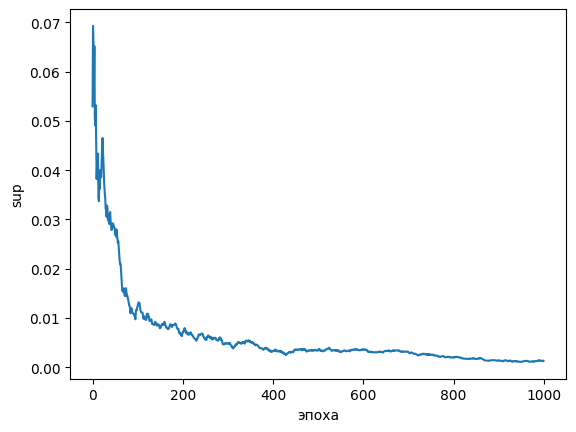

In [7]:
plt.plot(res)
plt.ylabel('sup')
plt.xlabel('эпоха')
plt.show()
# по графику можно заметитить, что сначала значение резко падает, а потом уменьшается плавнее

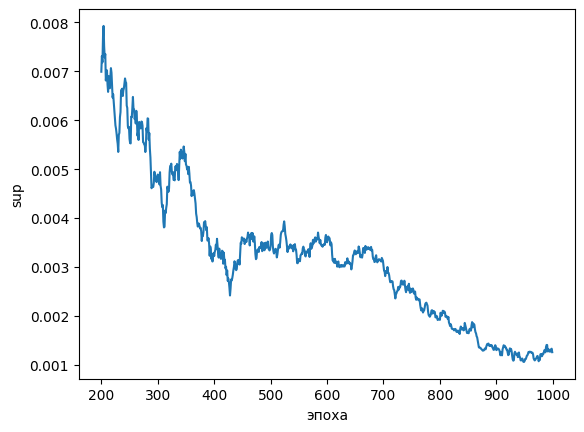

In [8]:
from_epoch = 200
plt.plot(range(from_epoch, len(res)),res[from_epoch:])
plt.ylabel('sup')
plt.xlabel('эпоха')
plt.show()

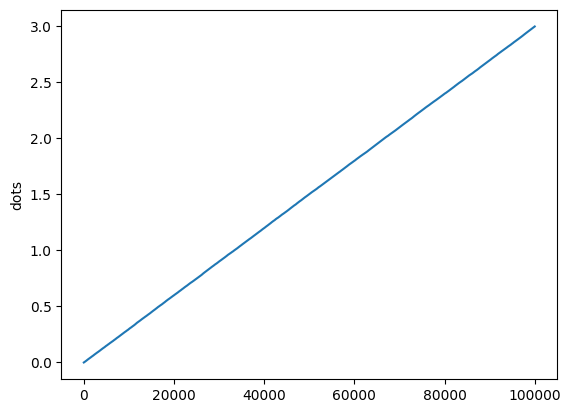

In [9]:
plt.plot(dots)
plt.ylabel('dots')
plt.show()